# Findings of the factors that influenced students' math scores from PISA data

## by Erin Yuan

## Investigation Overview

In this investigation, I wanted to find out whether or not some factors (selected from a huge dataset) could affect students' math scores, such as their mothers/fathers' job status, time they spent on using computers, etc. I also wanted to identify the relationships between the factors if there are any. 

## Dataset Overview

The original dataset contained 636 columns and 485490 rows. Since there were too many columns to fit in one investigation, I sliced out the ones I was most interested in and formed a new csv file called "new_data" which is in the same folder along my submission. The columns I selected are country, gender, mothers' job status, father's job status, whether to agree that listening in class is effective, how often do teachers show interest while teaching, wealth, time of computer use, students' mathematical interest, and finally the students' math scores. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('new_data')

# data wrangling
# change some data types 
# gender
df.gender = df.gender.astype('category')
# set 'job_status' as ordered categories
job = ['Working full-time <for pay>','Working part-time <for pay>','Not working, but looking for a job','Other (e.g. home duties, retired) ']
job_class =  pd.api.types.CategoricalDtype(ordered = True, categories = job)
df['mother_job_status'] =df['mother_job_status'].astype(job_class) 
df['father_job_status'] = df['father_job_status'].astype(job_class) 
# set 'teacher interes' as ordered categories
teacher_int = ['Every Lesson','Most Lessons','Some Lessons','Never or Hardly Ever']
teacher_int_class = pd.api.types.CategoricalDtype(ordered = True, categories = teacher_int)
df['teacher_show_interest'] = df['teacher_show_interest'].astype(teacher_int_class)
# set 'listen in class' as ordered categories
agree_list = ['Strongly agree','Agree','Disagree','Strongly disagree']
agree_class = pd.api.types.CategoricalDtype(ordered = True,categories = agree_list)
df['listen_in_class'] = df['listen_in_class'].astype(agree_class)


## Distribution of students' math scores 

Students' math scores presented a normal distribution, which had a mean value of 469 and a range from 55 to 903.

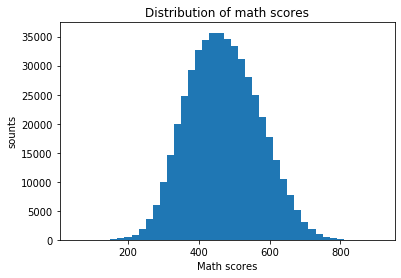

In [5]:
bin_size = np.arange(50,df.math_value.max()+20,20 )
plt.hist(data = df, x ='math_value', bins = bin_size)
plt.title('Distribution of math scores');
plt.xlabel('Math scores')
plt.ylabel('sounts');

## The top 10 countries with most repsonses vs. USA

We found that there was a wide distribution of the responses from different countries. If you are wondering about how many American families attended this survey, let's see the comparison. 

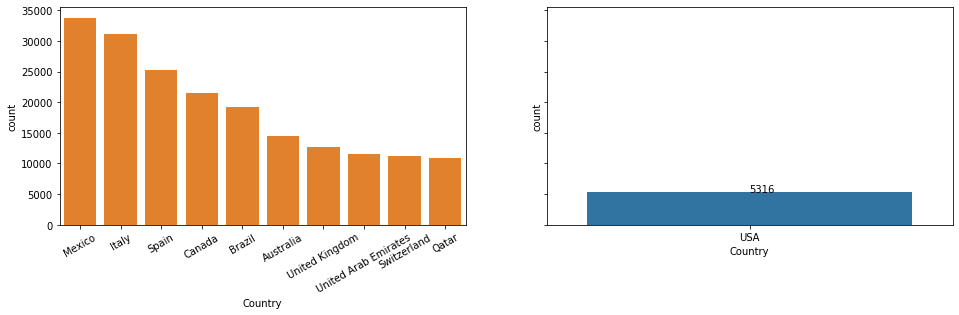

In [16]:
df.Country = df.Country.replace('Florida (USA)','USA')
df.Country = df.Country.replace('Connecticut (USA)','USA')
df.Country = df.Country.replace('Massachusetts (USA)','USA')


f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True,figsize = [16,4])
country_list = df.Country.value_counts()[:10].index
base_color = sb.color_palette()[1]
g = sb.countplot(data = df, x = 'Country', order = country_list, color = base_color, ax = ax1)
g.set_xticklabels(rotation=30, labels = country_list)
;


us = df.loc[df.Country =='USA']
sb.countplot(data = us, x = 'Country', ax = ax2)
plt.text(0,us.shape[0]+5,us.shape[0]);


## How did students' attitudes towards listening in class and teachers interest towards teaching relate to students' mathematical interest?

There is clear evidence that students' interest towards math had relationships with these two factors. Mathematical interest became larger when we moved to the left upper of both graphs.

In [41]:
# assist function for plotting 
def boxplot(var, color):
    fig, ax = plt.subplots(ncols = 2, figsize = [13,6])
    
    sb.boxplot(data = df, y = var, x = 'listen_in_class', ax = ax[0],
                  color = color)

    ax[0].set_xlabel("how much do students agree to listen in class")
    ax[0].set_ylabel('mathematical interest')
    sb.boxplot(data = df, y = var, x = 'teacher_show_interest', ax = ax[1],
               color = color)

    ax[1].set_xlabel("how much do teachers show interest while teaching")

    ax[1].set_ylabel("")
    fig.suptitle('How {} relates to students attitudes towards listening in class and teachers interest'.format(var.capitalize()))
    plt.show()

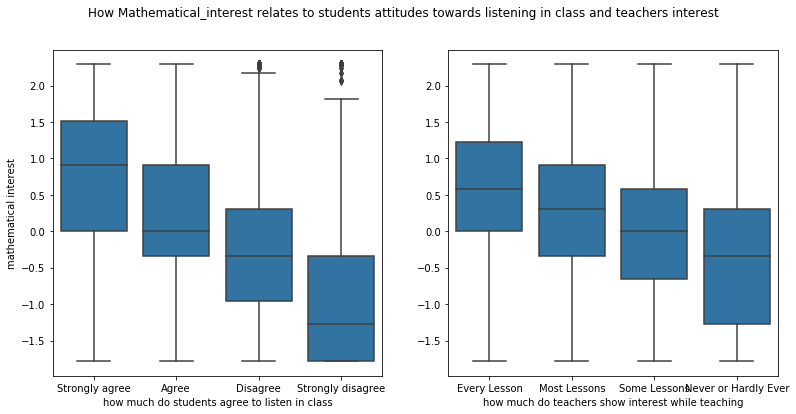

In [42]:
boxplot('mathematical_interest', sb.color_palette()[0])

## How about integrating both "whether to agree that listening in class is effective" and "whether teachers show interest while teaching" with students' math scores?
It's interesting to see that if teachers show interest in every lesson, students' math score becomes lower in every filter. For students who believe in listening in class, their math scores became the highest when teachers show interest in most lessons. Also, the more that students thought of listening in class as effective, the more likely these students could get higher math scores.

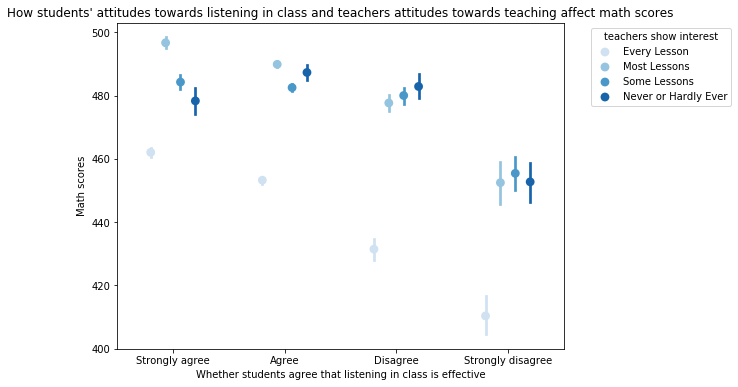

In [55]:

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'listen_in_class', y = 'math_value', hue = 'teacher_show_interest',
           palette = 'Blues', linestyles = '', dodge = 0.4, legend = False)
plt.legend(title= 'teachers show interest', bbox_to_anchor=(1.05, 1), loc=2)
plt.xlabel('Whether students agree that listening in class is effective')
plt.ylabel('Math scores')
plt.title("How students' attitudes towards listening in class and teachers attitudes towards teaching affect math scores");


